In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("reviews_cleaned.csv")
df = df.sample(n=5000, random_state=42)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'reviews_cleaned.csv'

In [ ]:
#Information about the dataset
df.info()
#Summary statistics of the dataset
df.describe()
#returns  number of columns and rows
print(df.shape)
#check for missing values
df.isnull().sum()
#fill the empty rows
df['Summary'] = df['Summary'].fillna("No Summary")


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1501 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
 10  Sentiment               5000 non-null   object
 11  Sentiment_Label         5000 non-null   int64 
 12  review_length           5000 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 546.9+ KB
(5000, 13)


In [ ]:
# Check for duplicates
print(df.duplicated().sum())
#Removes duplicated rows
data_cleaned = df.drop_duplicates()


0


In [ ]:
#Handling the Outliers

#calucte the review length(Number of words in the review)
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))

df.head()




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,208741,B003C5TCYU,A14J58XIIJVPC6,S. E.,0,0,5,1298764800,A Godsend for Dogs with Allergies,I rescued two puppies with a slew of health pr...,positive,1,108
2586,438937,B000LKWVFQ,A2S9UCSKKKPQZ,"Katherine Huskey ""winchestersgirl""",1,1,5,1247961600,Yum,"Yes, these are a little sticky. But they make ...",positive,1,31
2653,160271,B003DKT870,A1KM5RO5DSRKPU,baseballguy,0,0,3,1326499200,"Good, strong and not bitter","Good, strong cup of Java and not bitter like S...",neutral,0,20
1055,81550,B001EQ4RBM,A2754OLX4JI486,Fury,2,2,5,1311033600,Jalepeno Goodness,If you like snacks that are a healthier altern...,positive,1,44
705,479225,B00270YQ9M,A1P71XJ2S8LAWS,Charlie Hill,0,0,5,1280102400,Ghost Chilis,This is going to read like another ad for the ...,positive,1,199


In [ ]:
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
df['Sentiment'] = df['Score'].apply(score_to_sentiment)

In [ ]:
print(df['Sentiment'].value_counts())
print(df.head())

Sentiment
positive    3919
negative     703
neutral      378
Name: count, dtype: int64
          Id   ProductId          UserId                         ProfileName  \
1501  208741  B003C5TCYU  A14J58XIIJVPC6                               S. E.   
2586  438937  B000LKWVFQ   A2S9UCSKKKPQZ  Katherine Huskey "winchestersgirl"   
2653  160271  B003DKT870  A1KM5RO5DSRKPU                         baseballguy   
1055   81550  B001EQ4RBM  A2754OLX4JI486                                Fury   
705   479225  B00270YQ9M  A1P71XJ2S8LAWS                        Charlie Hill   

      HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
1501                     0                       0      5  1298764800   
2586                     1                       1      5  1247961600   
2653                     0                       0      3  1326499200   
1055                     2                       2      5  1311033600   
705                      0                       0      5  12801024

In [ ]:
# Map sentiment to numbers
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_map)

# Reorder columns to place Sentiment_Label next to Sentiment
sentiment_col = df.pop('Sentiment_Label')
df.insert(df.columns.get_loc('Sentiment') + 1, 'Sentiment_Label', sentiment_col)

# Preview
print(df[['Sentiment', 'Sentiment_Label']].head())


     Sentiment  Sentiment_Label
1501  positive                1
2586  positive                1
2653   neutral                0
1055  positive                1
705   positive                1


In [ ]:
df.to_csv('reviews_cleaned.csv', index=False)

In [ ]:

for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].value_counts())
    print("-" * 50)

Unique values in 'Id':
Id
208741    1
173949    1
280140    1
219271    1
326975    1
         ..
148710    1
282022    1
539517    1
451730    1
355444    1
Name: count, Length: 5000, dtype: int64
--------------------------------------------------
Unique values in 'ProductId':
ProductId
B007JFMH8M    13
B001RVFEP2    10
B000VK8AVK    10
B000PDWBKO     9
B000NMJWZO     8
              ..
B0015WUQ24     1
B003XP3010     1
B000E7UJLO     1
B000CRIUNU     1
B007PA33KM     1
Name: count, Length: 3805, dtype: int64
--------------------------------------------------
Unique values in 'UserId':
UserId
A1YUL9PCJR3JTY    8
AY12DBB0U420B     5
A281NPSIMI1C2R    4
A2YNIKQDLZR2WW    4
A29JUMRL1US6YP    4
                 ..
A2U7IZRM920GZH    1
A1P5DJFET8R96P    1
AXHTH0EL75SOJ     1
A7T1NIWZHTC4P     1
AWQ679PTXJDB5     1
Name: count, Length: 4810, dtype: int64
--------------------------------------------------
Unique values in 'ProfileName':
ProfileName
O. Brown "Ms. O. Khannah-Brown"    8
Gary Pe

In [ ]:
import string
import re  
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from num2words import num2words 




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def clean_text(text):
    text = BeautifulSoup(str(text), "html.parser").get_text()
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)  # Convert digits to words
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the function to the 'Text' column (adjusting the column name)
df['clean_review'] = df['Text'].apply(clean_text)

# Verify the output
print(df[['Text', 'clean_review']].head())  # Check the first few rows

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\2180239856.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(str(text), "html.parser").get_text()


                                                   Text  \
1501  I rescued two puppies with a slew of health pr...   
2586  Yes, these are a little sticky. But they make ...   
2653  Good, strong cup of Java and not bitter like S...   
1055  If you like snacks that are a healthier altern...   
705   This is going to read like another ad for the ...   

                                           clean_review  
1501  rescued two puppies slew health problems mange...  
2586  yes little sticky make addictively deliciousth...  
2653  good strong cup java bitter like starbucks how...  
1055  like snacks healthier alternative options almo...  
705   going read like another ad company rarely comp...  


In [ ]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length,clean_review
1501,208741,B003C5TCYU,A14J58XIIJVPC6,S. E.,0,0,5,1298764800,A Godsend for Dogs with Allergies,I rescued two puppies with a slew of health pr...,positive,1,108,rescued two puppies slew health problems mange...
2586,438937,B000LKWVFQ,A2S9UCSKKKPQZ,"Katherine Huskey ""winchestersgirl""",1,1,5,1247961600,Yum,"Yes, these are a little sticky. But they make ...",positive,1,31,yes little sticky make addictively deliciousth...
2653,160271,B003DKT870,A1KM5RO5DSRKPU,baseballguy,0,0,3,1326499200,"Good, strong and not bitter","Good, strong cup of Java and not bitter like S...",neutral,0,20,good strong cup java bitter like starbucks how...
1055,81550,B001EQ4RBM,A2754OLX4JI486,Fury,2,2,5,1311033600,Jalepeno Goodness,If you like snacks that are a healthier altern...,positive,1,44,like snacks healthier alternative options almo...
705,479225,B00270YQ9M,A1P71XJ2S8LAWS,Charlie Hill,0,0,5,1280102400,Ghost Chilis,This is going to read like another ad for the ...,positive,1,199,going read like another ad company rarely comp...


# Exploratory data analysis

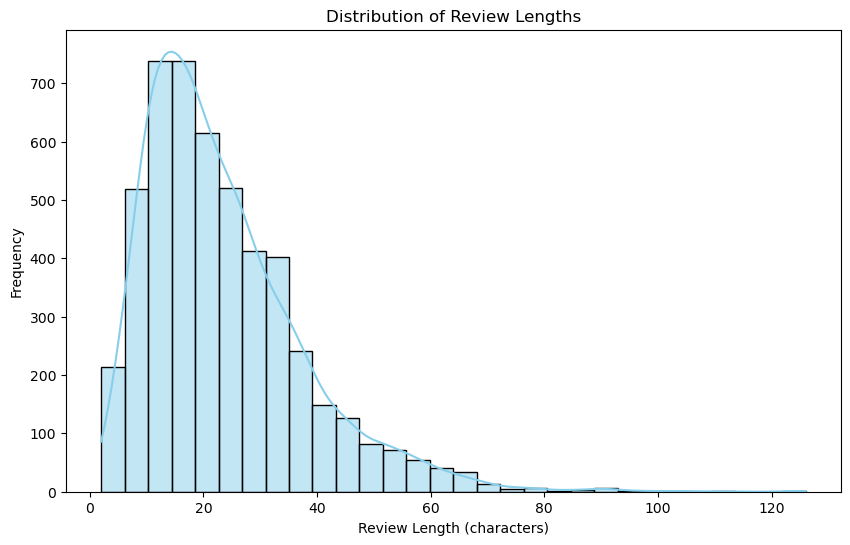

In [ ]:
# Visualizing review text lengths
df['review_length'] = df['Summary'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()


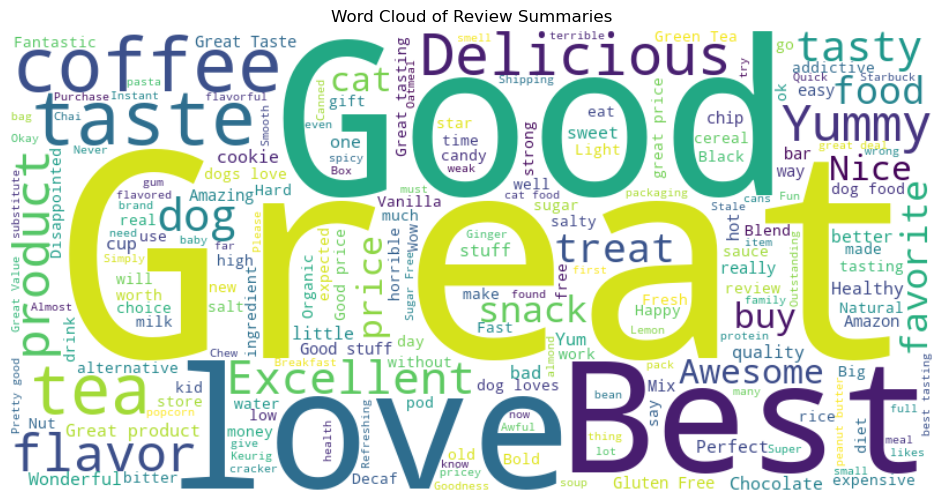

In [ ]:
# Word cloud (if text-based)
from wordcloud import WordCloud

text = " ".join(df['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_18988\4010540876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


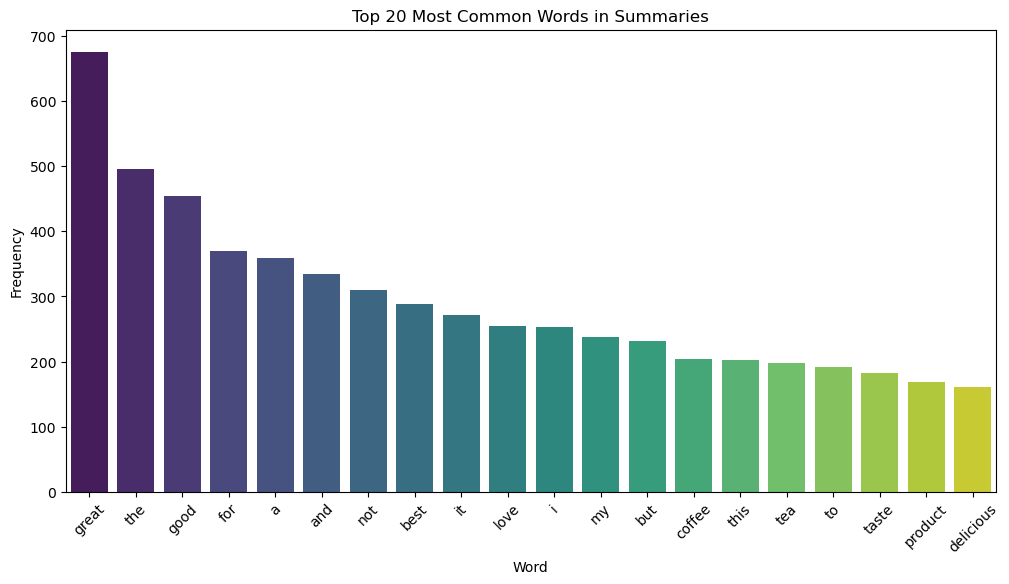

In [ ]:
# Top 20 most common words (basic frequency count)
from collections import Counter
import re

words = []
for summary in df['Summary']:
    words += re.findall(r'\b\w+\b', summary.lower())

word_freq = Counter(words)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_18988\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


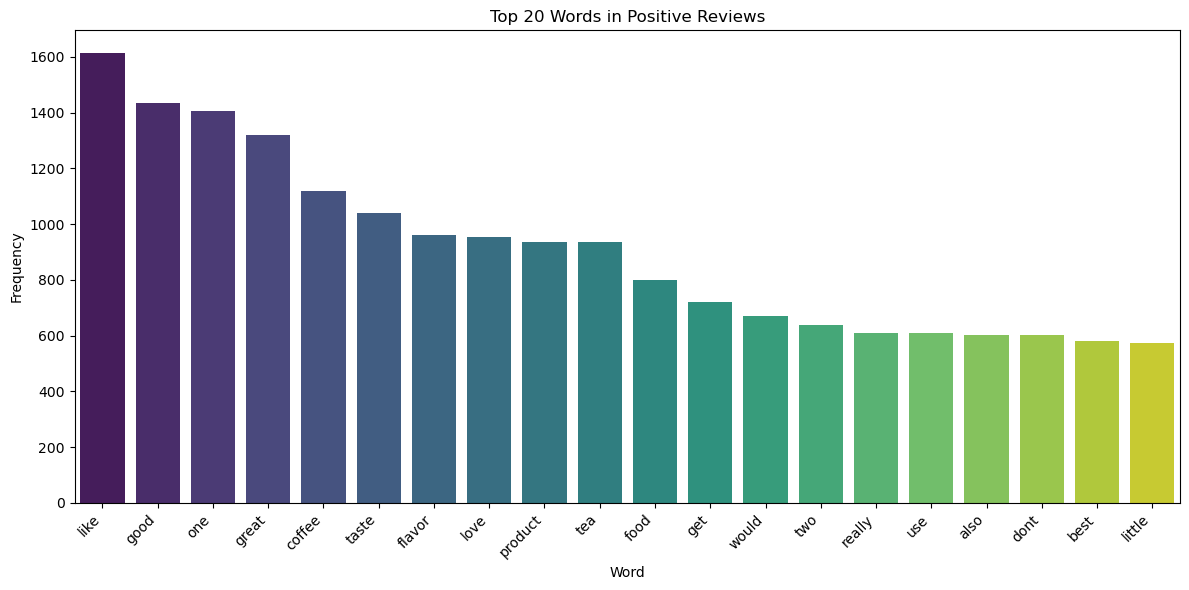

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


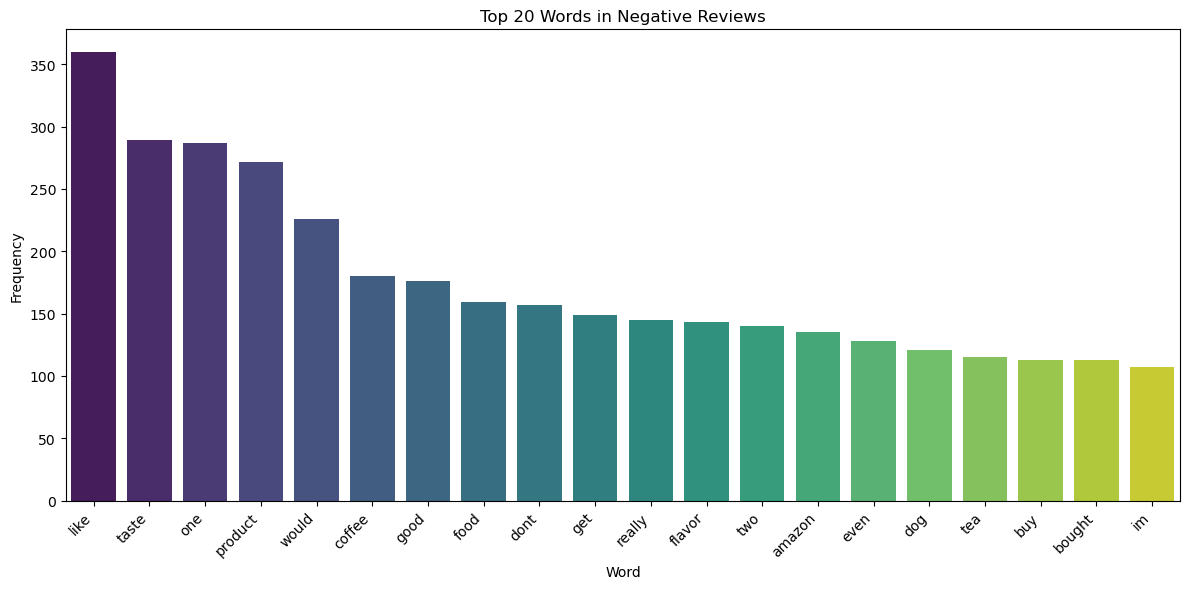

In [ ]:
from collections import Counter

# Function to count word frequencies and display a bar graph
def word_frequency_graph(text_column, title="Top 20 Most Common Words", top_n=20):
    all_words = ' '.join(text_column).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(top_n)

    words, freqs = zip(*common_words)  # Unzip words and frequencies

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjusting layout to prevent labels from overlapping
    plt.show()

# Get common words for positive and negative reviews and display graphs
positive_reviews = df[df['Sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['Sentiment'] == 'negative']['clean_review']

word_frequency_graph(positive_reviews, title="Top 20 Words in Positive Reviews")
word_frequency_graph(negative_reviews, title="Top 20 Words in Negative Reviews")

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


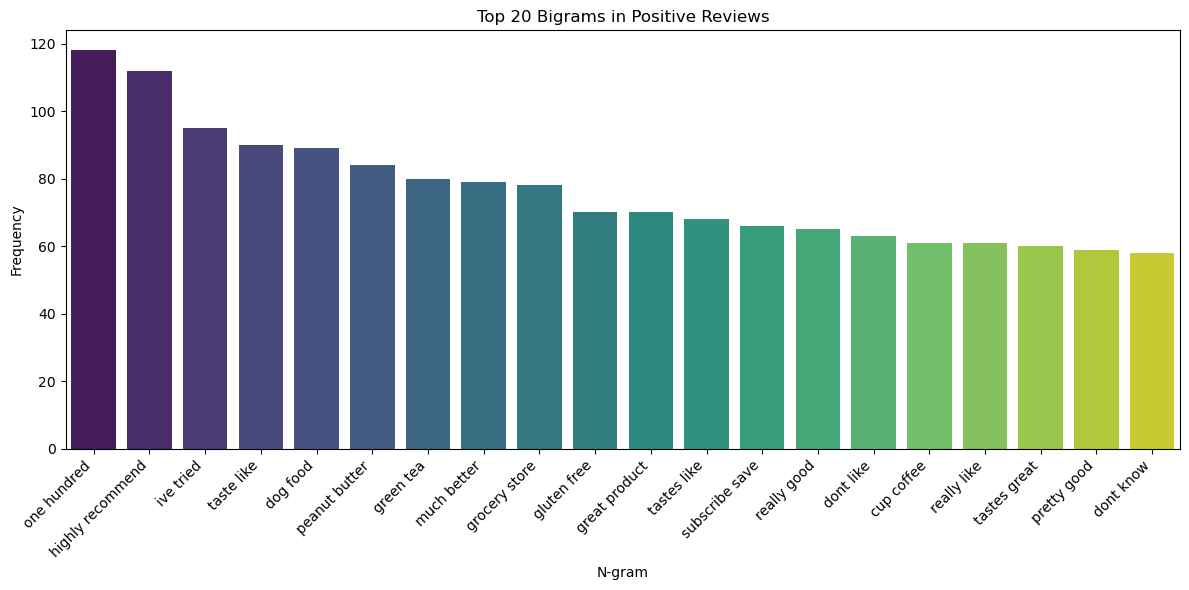

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


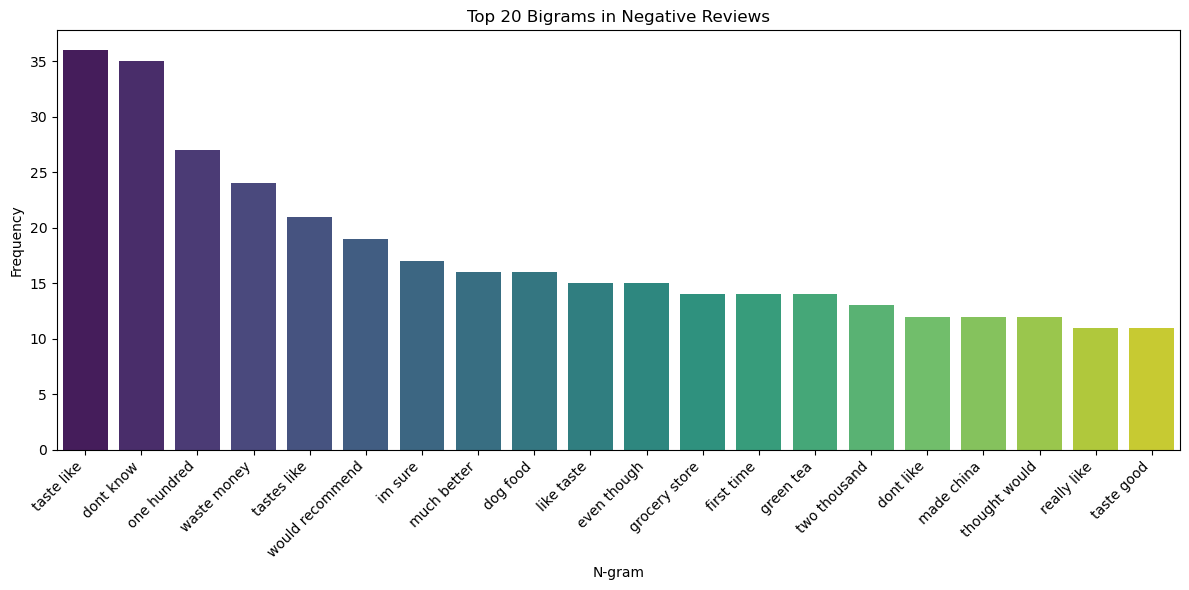

In [ ]:
from nltk.util import ngrams

# Function to generate n-grams, count frequencies, and display a bar graph
def n_gram_frequency_graph(text_column, n=2, title=f"Top 20 Bigrams", top_n=20):
    n_grams = []
    for text in text_column:
        words = text.split()
        n_grams.extend(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    common_n_grams = n_gram_counts.most_common(top_n)

    # Convert n-grams to strings for plotting
    ngrams_strings = [" ".join(ngram) for ngram in dict(common_n_grams).keys()]
    freqs = list(dict(common_n_grams).values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Get common bigrams (2-word phrases) and display graphs
positive_bigrams = df[df['Sentiment'] == 'positive']['clean_review']
negative_bigrams = df[df['Sentiment'] == 'negative']['clean_review']

n_gram_frequency_graph(positive_bigrams, n=2, title="Top 20 Bigrams in Positive Reviews")
n_gram_frequency_graph(negative_bigrams, n=2, title="Top 20 Bigrams in Negative Reviews")

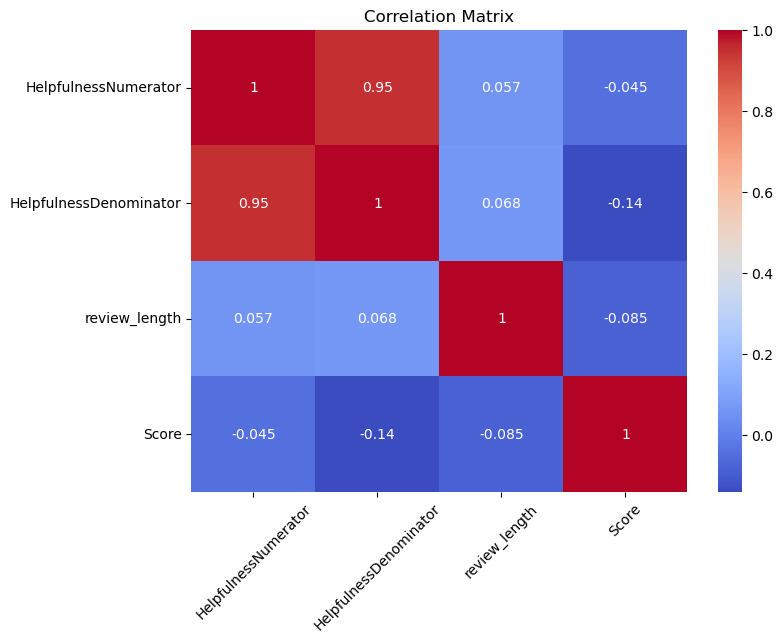

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'review_length', 'Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

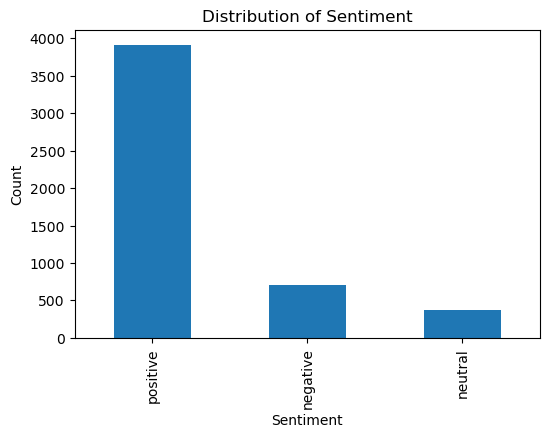

In [ ]:
# Visualize the distribution of sentiment
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Word Cloud for Positive Reviews


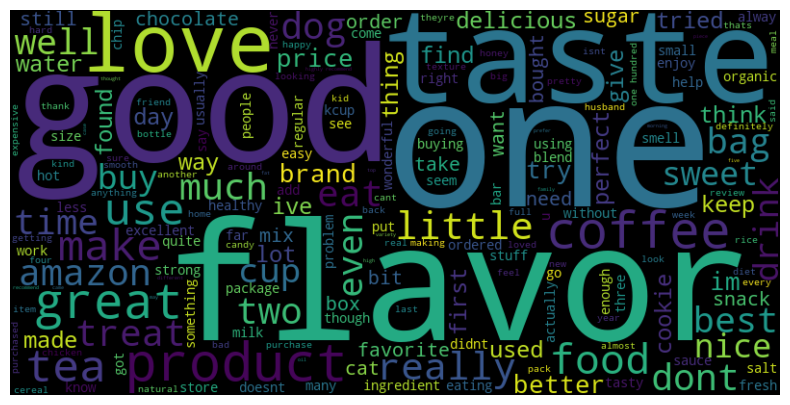

Word Cloud for Negative Reviews


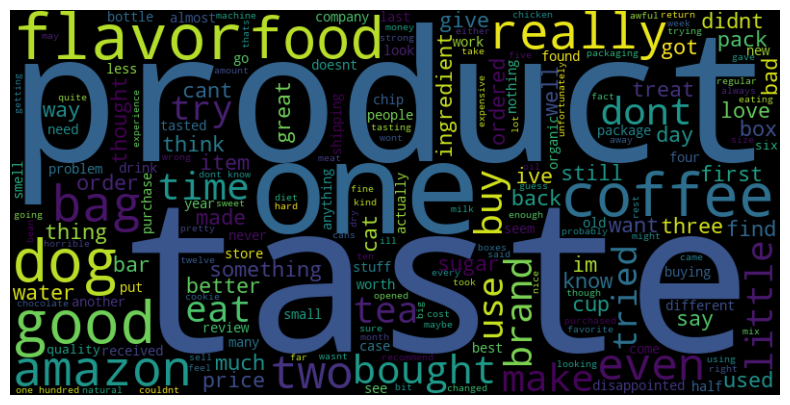

In [ ]:
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(text_column):
    text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative reviews
print("Word Cloud for Positive Reviews")
generate_word_cloud(positive_reviews)

print("Word Cloud for Negative Reviews")
generate_word_cloud(negative_reviews)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # For one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping # For early stopping
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 1. Data Preparation

# Tokenization and Padding (as before)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
padded_sequences = pad_sequences(sequences, maxlen=200, truncating='post')

# One-hot encode the target variable (multi-class)
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['Sentiment_Label'])  # shape: (num_samples, num_classes)
# Convert to numpy array
y = np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_balanced = X_train_resampled
y_train_balanced = y_train_resampled

# 2. Model Architecture (Multi-class)

def create_model(vocab_size, embedding_dim, max_length, num_classes):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(64, return_sequences=True), # Increased LSTM units
        LSTM(32),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # softmax for multi-class
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # categorical_crossentropy
                  metrics=['accuracy'])
    return model

vocab_size = 10000
embedding_dim = 32
max_length = 200
num_classes = y.shape[1] # Get number of classes from y

model = create_model(vocab_size, embedding_dim, max_length, num_classes)

# 3. Training the Model

model.summary()

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Stop if val_loss doesn't improve for 3 epochs

history = model.fit(X_train, y_train,
                    epochs=20, # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7697 - loss: 0.7692 - val_accuracy: 0.7560 - val_loss: 0.6698
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 244ms/step - accuracy: 0.8200 - loss: 0.5066 - val_accuracy: 0.7940 - val_loss: 0.5722
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - accuracy: 0.8878 - loss: 0.3218 - val_accuracy: 0.7920 - val_loss: 0.6019
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.9082 - loss: 0.2351 - val_accuracy: 0.7740 - val_loss: 0.7749
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 283ms/step - accuracy: 0.9207 - loss: 0.1743 - val_accuracy: 0.7690 - val_loss: 0.9305


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# print(classification_report(y_true_classes, y_pred_classes, target_names=label_binarizer.classes_))
# print(confusion_matrix(y_true_classes, y_pred_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [5]:
label_map = {"negative": 0, "neutral": 1, "positive": 2}
 
encoded_labels = [label_map[label] for label in df['Sentiment']]
y = encoded_labels
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Summary'].values.astype('U'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

# Logistic Regression modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) 

NameError: name 'X_train' is not defined

In [ ]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# XGBoost Modeling

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

# Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

val_accuracies = [0.7389, 0.7023, 0.7050]
test_accuracies = [0.7244, 0.6931, 0.6764]


x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0.65, 0.78)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()